<a href="https://colab.research.google.com/github/AamirKhaan/Student-Academic-Performance/blob/master/15_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:Aqua; padding:20px; border-radius:10px">Artificial Neural Network (ANN) (TensorFlow)</h1>

## Overview      

<div style="background-color:Gainsboro; padding:20px; text-align:justify; font-weight: bold">
    <p>In this section following steps are performed: </p>
    <ol>
        <li>Data Preparation and Encoding</li>
        <li>Preliminary ANN Model</li>
        <li>ANN Optimization with Number of Epochs </li>
    </ol>
</div>


### Standard Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.math import confusion_matrix

from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [2]:
# Jupyter Noteboook Configurations (personal prefrences)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set() 

In [3]:
# Global parameters for figure
plt.rcParams["figure.figsize"] = [10.00, 8.00]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.autolayout"] = True

### 1. Data Preparation and Encoding

#### 1.1 Import Modified Data

In [4]:
# Import the Student's data from local storage
# ! Dont' run the cell in colab
data_df = pd.read_csv('./data/xAPI-Edu-Data_modified.csv')

In [ ]:
# Import the Student's data from github storage
# Run only in colab
url = 'https://raw.githubusercontent.com/AamirKhaan/Student-Academic-Performance/main/data/xAPI-Edu-Data_modified.csv'
data_df = pd.read_csv(url)

In [5]:
# Selected Features
CATEGORICAL_FEATURES = ['stage_id','relation', 'parent_answering_survey', 
                            'parent_school_satisfaction','student_absence_days']
NUMERICAL_FEATURES = ['raised_hands', 'visited_resources', 'announcements_view', 'discussion']
TARGET = ['class']

In [6]:
# Optimize Data Type for efficent memory utilization
for feature in CATEGORICAL_FEATURES:
    data_df[feature] = data_df[feature].astype('category')
    
for feature in NUMERICAL_FEATURES:
    data_df[feature] = data_df[feature].astype('int8')

data_df[TARGET] = data_df[TARGET].astype('category')

#### 1.2 Encode Data

In [7]:
# Input Features Encoding
categorical_encoder = OrdinalEncoder(dtype='int8')
categorical_ds  = categorical_encoder.fit_transform(data_df[CATEGORICAL_FEATURES])
categorical_encoded = pd.DataFrame(categorical_ds, columns=CATEGORICAL_FEATURES, dtype='int8')
# Target Encoding
target_encoder = LabelEncoder()
target_ds = target_encoder.fit_transform(data_df[TARGET])
target_encoded = pd.DataFrame(target_ds, columns=TARGET, dtype='int8')
# Combine the Data
encoded_df = pd.concat([categorical_encoded,data_df[NUMERICAL_FEATURES]], axis=1)

### 2.  Preliminary ANN Model

In [8]:
X = encoded_df
y = target_encoded

In [9]:
# Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
# Standard Scaler Transform
transformer = StandardScaler()
transformer.fit(X_train)

X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [11]:
# Random Seed 
tf.random.set_seed(42)

In [12]:
# ANN Model
ann_model= Sequential()
ann_model.add(Dense(32, input_shape = (X_train.shape[1],), activation ='relu', name = 'Input_Layer'))
ann_model.add(Dense(3, activation='softmax', name = 'Output_Layer'))

In [13]:
# Loss and Optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(0.0001)

In [14]:
# Compile the Model
ann_model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

#### 2.1 Model Parameters

In [15]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 32)                320       
                                                                 
 Output_Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


#### 2.2 ANN Structure

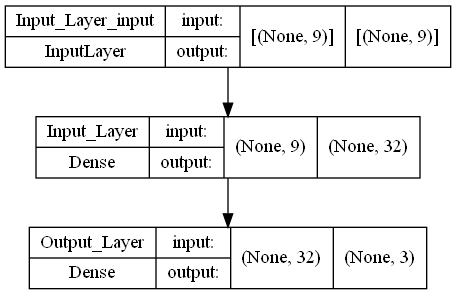

In [16]:
plot_model(ann_model, to_file='images/ANN_model.png', show_shapes=True)

In [17]:
result = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0);

#### 2.3 Model Scores

In [18]:
# Test Accuracy 
print(f"Preliminary ANN Test Accuracy: {result.history['val_accuracy'][-1]*100}")
# Train Accuracy
print(f"Preliminary ANN Train Accuracy: {result.history['accuracy'][-1] *100}")

Preliminary ANN Test Accuracy: 72.78481125831604
Preliminary ANN Train Accuracy: 83.43750238418579


<div style="background-color:Gainsboro; padding:20px; text-align:justify; ">
<p>The accuracy of the model on Training Data (83.44%) and the accuracy on Test Data (72.78%).</p>
</div>

#### 2.4 Preliminary ANN Learning Curve

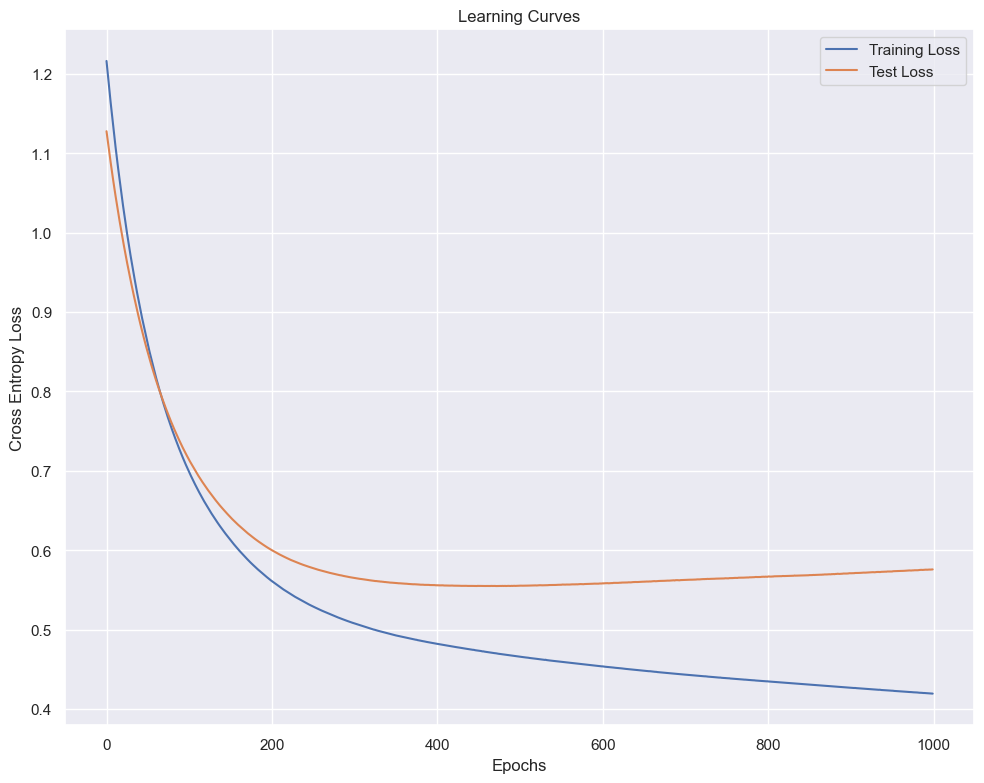

In [19]:
# Plot loss per epoch
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Test Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend();

#### 2.5 Preliminary ANN Accuracy Curve

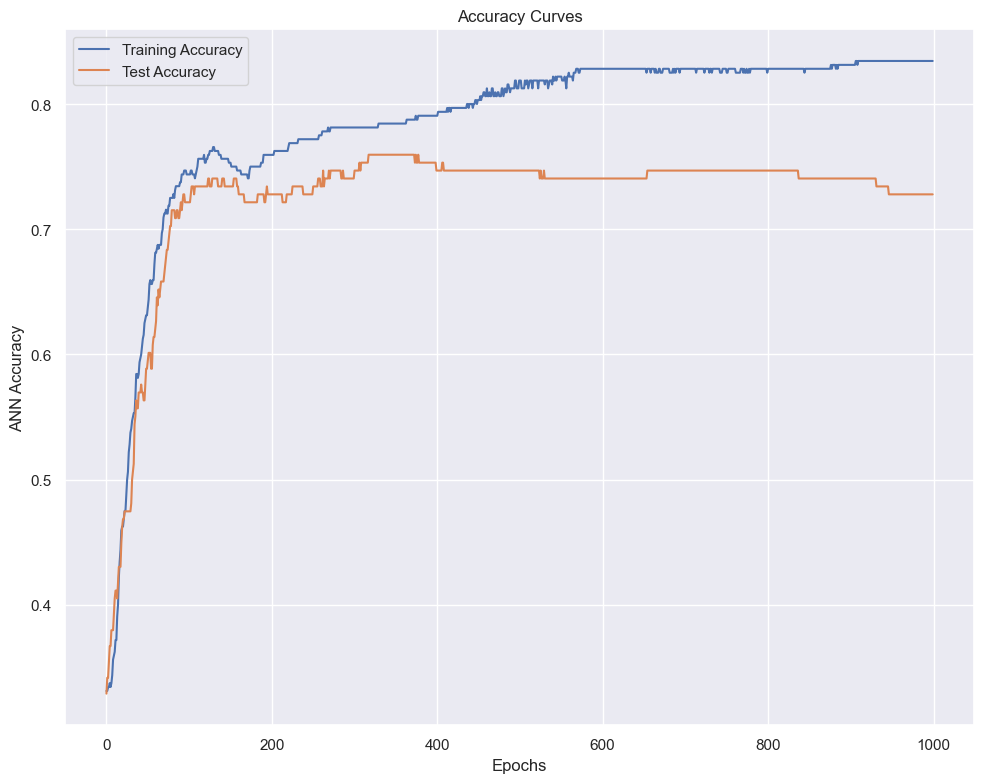

In [20]:
# Plot accuracy per epoch
plt.plot(result.history['accuracy'], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('ANN Accuracy')
plt.legend();

<div style="background-color:Gainsboro; padding:20px; text-align:justify;">
<p>The graph of ANN Accuracy vs Epochs show the variation in the accuracy with respect to Epochs in Training and Test data. The highest accuracy in test data is when the number of epochs are around 350.</p>
</div>

#### 2.6 Confusion Matrix

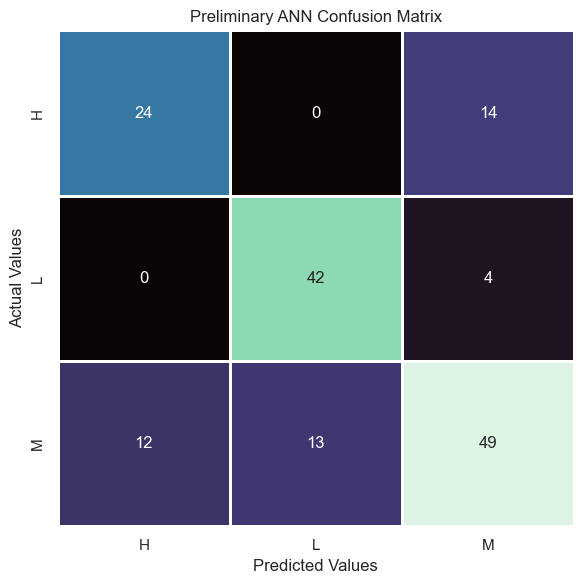

In [21]:
y_hat = [np.argmax(x) for x in ann_model.predict(X_test)]

ann_cm_df = pd.DataFrame(confusion_matrix(y_test, y_hat),
                     index = ['H','L','M'], 
                     columns = ['H','L','M'])

fig = plt.figure(figsize=(6,6))
sns.heatmap(ann_cm_df, annot=True, cmap='mako',cbar=False,linewidth=1)
plt.title('Preliminary ANN Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### 2.7 Classification Report

In [22]:
from sklearn.metrics import classification_report
print('Preliminary ANN Classification Report\n')
print(classification_report(y_test,y_hat, target_names=['H','L','M']))

Preliminary ANN Classification Report

              precision    recall  f1-score   support

           H       0.67      0.63      0.65        38
           L       0.76      0.91      0.83        46
           M       0.73      0.66      0.70        74

    accuracy                           0.73       158
   macro avg       0.72      0.74      0.73       158
weighted avg       0.73      0.73      0.72       158



### 3. ANN with optimized Number of Epochs

<div style="background-color:Gainsboro; padding:20px; text-align:justify;">
The best model can be found out by seraching for the maximum test accuracy in the history.
</div>

In [23]:
max_test_accuracy = max(result.history['val_accuracy'])*100
print(f'Maximum Test Accuracy : {max_test_accuracy}')

Maximum Test Accuracy : 75.94936490058899


In [24]:
optimal_epoch = np.where(np.array(result.history['val_accuracy']) == max(result.history['val_accuracy']))
optimal_epoch

(array([317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
        330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
        343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,
        356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
        369, 370, 371, 372, 374, 377], dtype=int64),)

<div style="background-color:Gainsboro; padding:20px; text-align:justify;">
Any suitable epoch value can be selected for the ANN training from the list of optimal_epoch.
</DIV>

In [25]:
# Random Seed 
tf.random.set_seed(42)

# ANN Model
opt_ann_model= Sequential()
opt_ann_model.add(Dense(32, input_shape = (X_train.shape[1],), activation ='relu', name = 'Input_Layer'))
opt_ann_model.add(Dense(3, activation='softmax', name = 'Output_Layer'))

# Loss and Optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(0.0001)

# Compile the Model
opt_ann_model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy'])

opt_result = opt_ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=350, verbose=0);

#### 3.1 Optimized ANN Scores

In [26]:
# Test Accuracy 
print(f"Optimized ANN Test Accuracy: {opt_result.history['val_accuracy'][-1]*100}")
# Train Accuracy
print(f"Optimized ANN Train Accuracy: {opt_result.history['accuracy'][-1] *100}")

Optimized ANN Test Accuracy: 75.94936490058899
Optimized ANN Train Accuracy: 78.4375011920929


<div style="background-color:Gainsboro; padding:20px; text-align:justify; ">
<p>The accuracy of the optimized model on Training Data (78.44%) is close to the accuracy on Test Data (75.95%). The model shows acceptable performance. </p>
</div>

#### 3.2 Optimized ANN Learning Curve

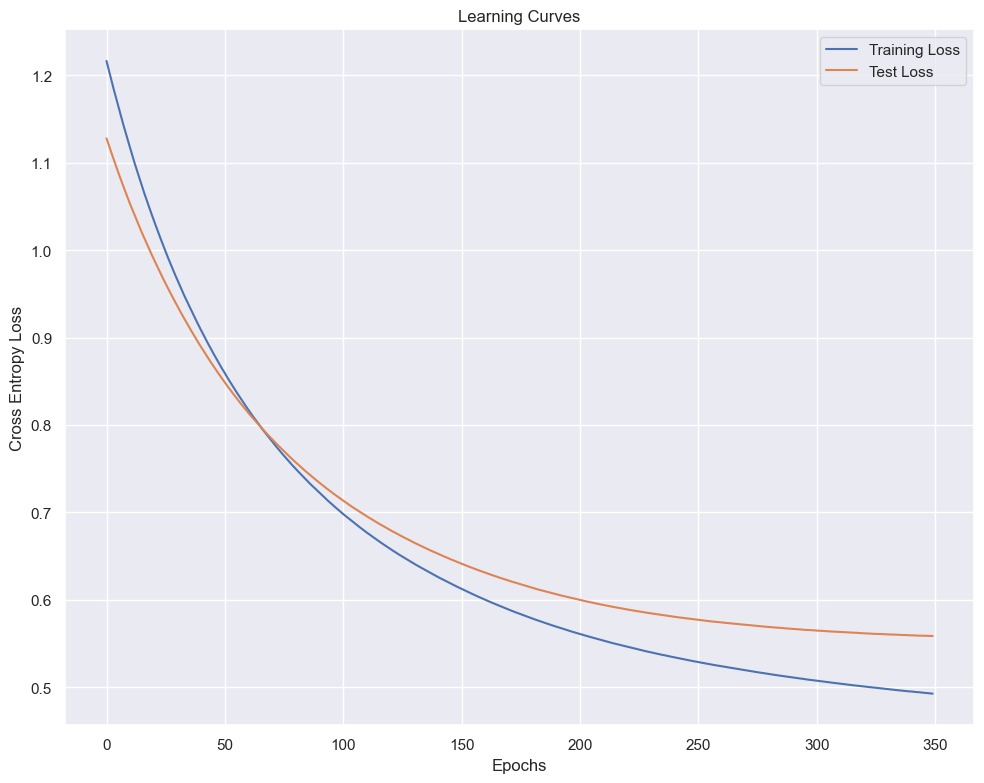

In [27]:
# Plot loss per epoch
plt.plot(opt_result.history['loss'], label='Training Loss')
plt.plot(opt_result.history['val_loss'], label='Test Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend();

#### 3.3 Optimized ANN Accuracy Curve

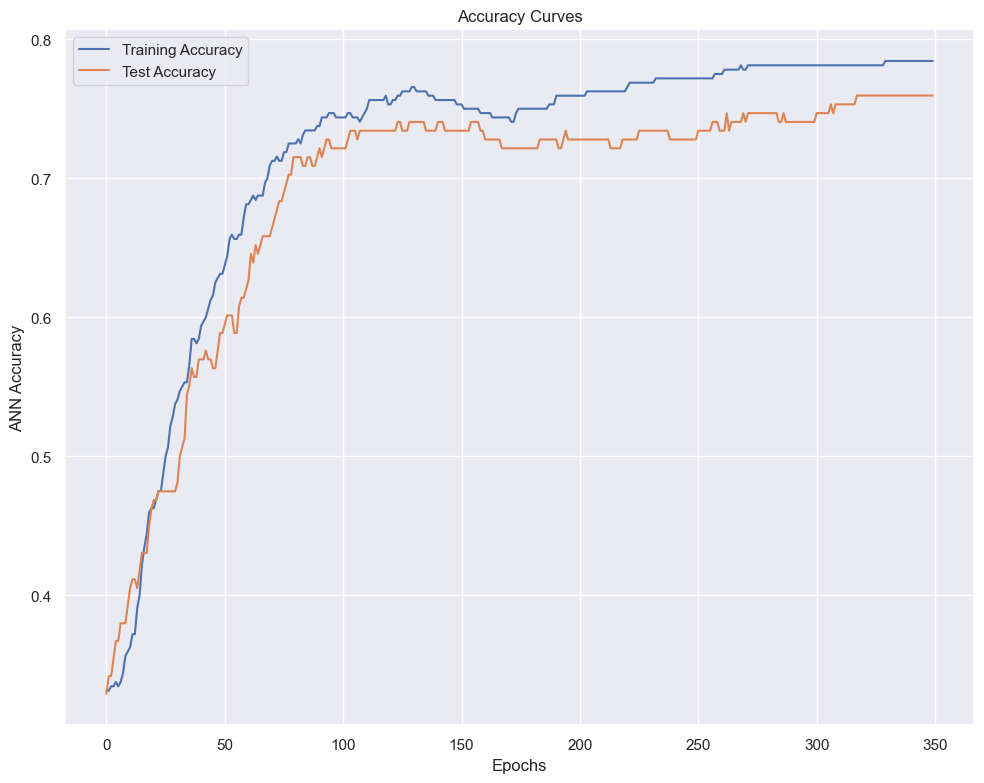

In [28]:
# Plot accuracy per epoch
plt.plot(opt_result.history['accuracy'], label='Training Accuracy')
plt.plot(opt_result.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('ANN Accuracy')
plt.legend();

#### 3.4 Optimized ANN Confusion Matrix

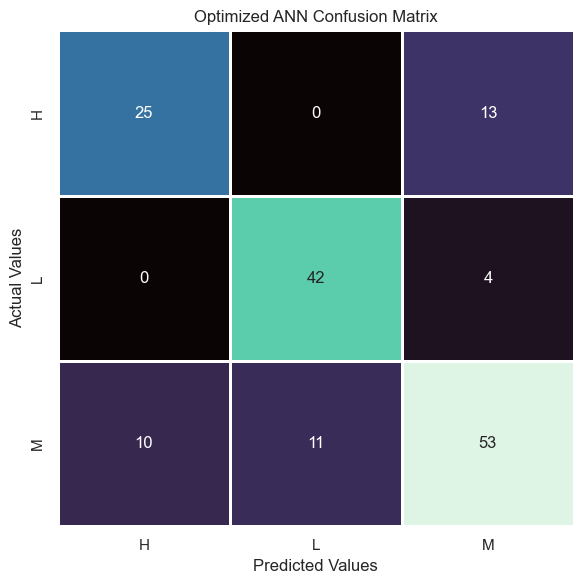

In [29]:
opt_y_test = [np.argmax(x) for x in opt_ann_model.predict(X_test)]
ocm_df = pd.DataFrame(confusion_matrix(y_test, opt_y_test),
                     index = ['H','L','M'], 
                     columns = ['H','L','M'])

fig = plt.figure(figsize=(6,6))
sns.heatmap(ocm_df, annot=True, cmap='mako',cbar=False,linewidth=1)
plt.title('Optimized ANN Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### 3.5 Optimized ANN Classification report

In [30]:
print('Optimized ANN Classification Report\n')
print(classification_report(y_test,opt_y_test, target_names=['H','L','M']))

Optimized ANN Classification Report

              precision    recall  f1-score   support

           H       0.71      0.66      0.68        38
           L       0.79      0.91      0.85        46
           M       0.76      0.72      0.74        74

    accuracy                           0.76       158
   macro avg       0.75      0.76      0.76       158
weighted avg       0.76      0.76      0.76       158



## Observations
  
The key observations are:  
   
1. The Preliminary ANN has:     
    a. Test Accuracy of 72.78%     
    b. Train Accuracy of 83.43%     
2. Optimization by varying number of epochs (350) results in highest accuracy of 75.95%.
3. The Optimized ANN has:   
    a. Test Accuracy of 75.95%     
    b. Train Accuracy of 78.44%    

## Conclusion
Based on the obervations:

1. The Optimized ANN produced the maximum test accuracy of 75.95%.